In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
df= pd.read_csv('C:/Users/91959/Downloads/Amazon_Sale_Report.csv')

C:\Users\91959\AppData\Local\Temp\ipykernel_13380\3825403384.py:1: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv('C:/Users/91959/Downloads/Amazon_Sale_Report.csv')


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

In [31]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [32]:
# Convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [33]:
print(df.describe())

               index            Qty         Amount  ship-postal-code
count  128975.000000  128975.000000  121180.000000     128942.000000
mean    64487.000000       0.904431     648.561465     463966.236509
std     37232.019822       0.313354     281.211687     191476.764941
min         0.000000       0.000000       0.000000     110001.000000
25%     32243.500000       1.000000     449.000000     382421.000000
50%     64487.000000       1.000000     605.000000     500033.000000
75%     96730.500000       1.000000     788.000000     600024.000000
max    128974.000000      15.000000    5584.000000     989898.000000


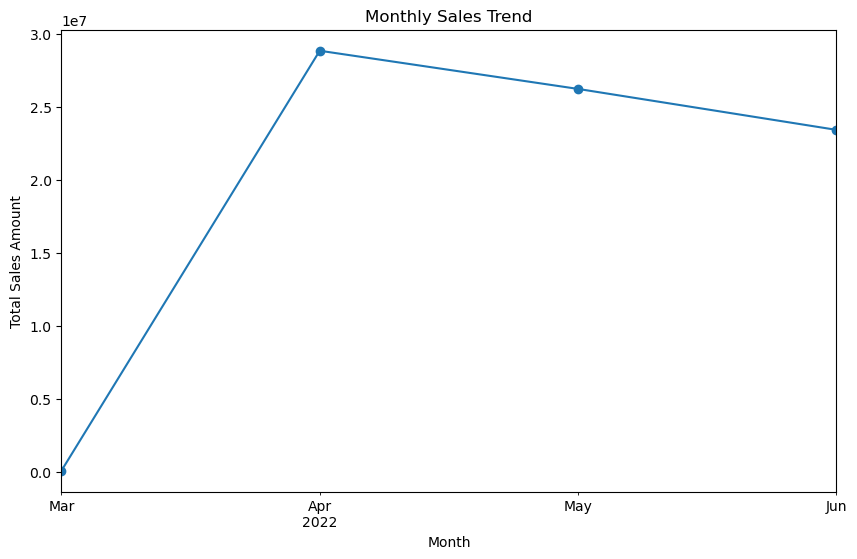

In [34]:
# Example: Monthly sales trend
df['Month'] = df['Date'].dt.to_period('M')  # Extract month from the 'Date' column
monthly_sales = df.groupby('Month')['Amount'].sum()
monthly_sales.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.show()

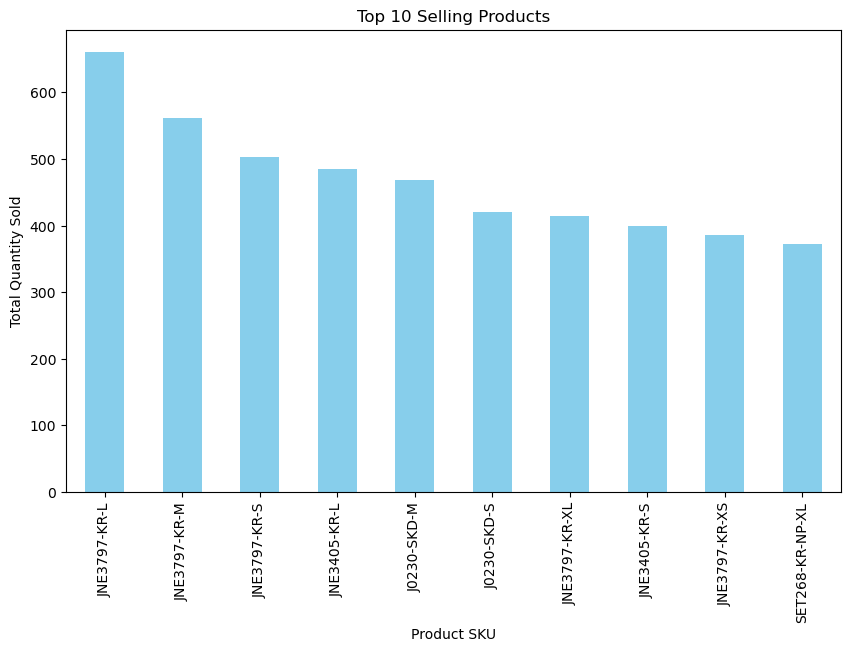

In [35]:
# Example: Top-selling products
top_products = df.groupby('SKU')['Qty'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Top 10 Selling Products')
plt.xlabel('Product SKU')
plt.ylabel('Total Quantity Sold')
plt.show()

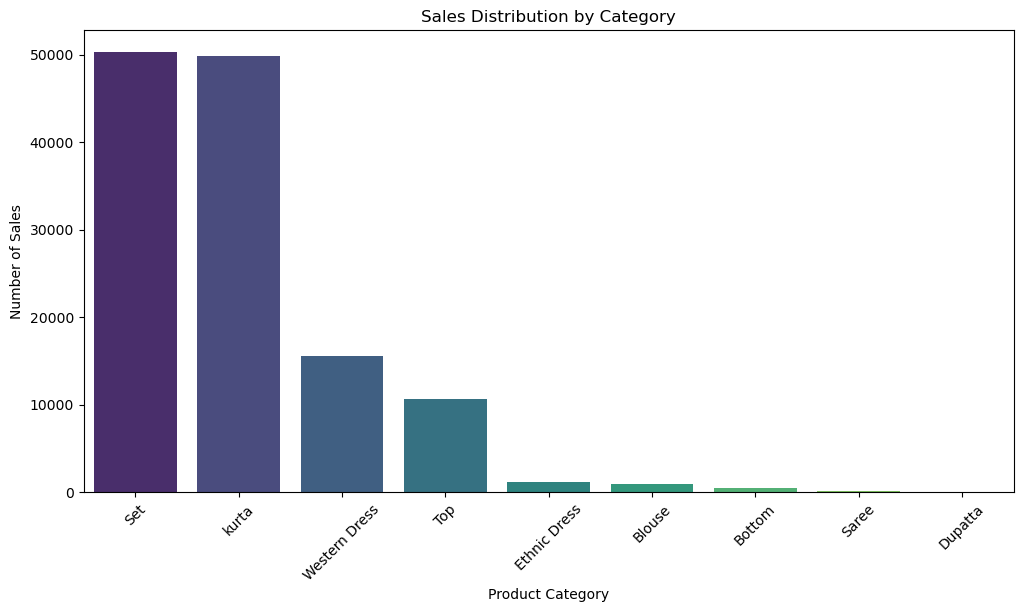

In [43]:
# Example: Sales distribution by category
plt.figure(figsize=(12, 6))
sns.countplot(x='Category', data=df, order=df['Category'].value_counts().index, palette='viridis')
plt.title('Sales Distribution by Category')
plt.xlabel('Product Category')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45)
plt.show()

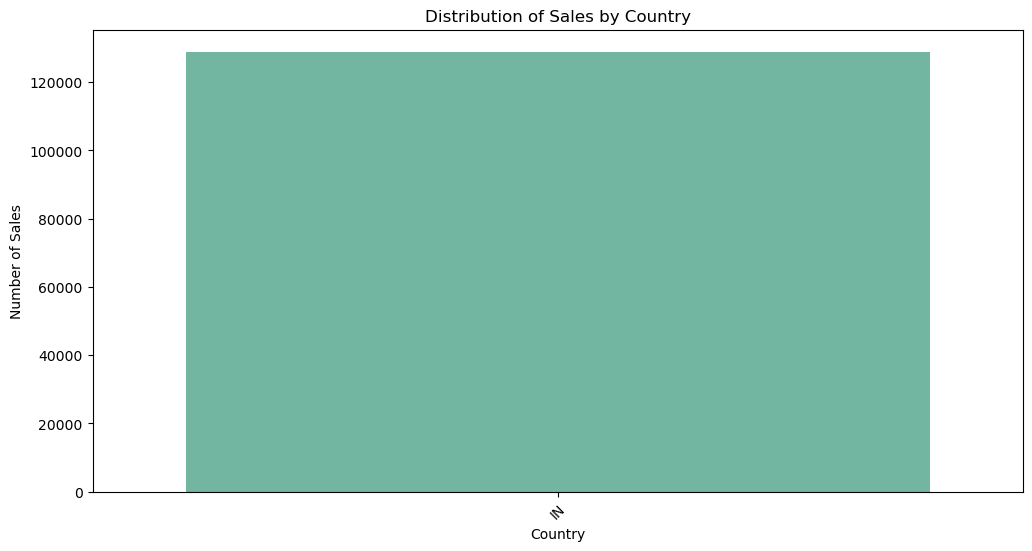

In [44]:
# Example: Distribution of sales by country
plt.figure(figsize=(12, 6))
sns.countplot(x='ship-country', data=df, order=df['ship-country'].value_counts().index, palette='Set2')
plt.title('Distribution of Sales by Country')
plt.xlabel('Country')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45)
plt.show()

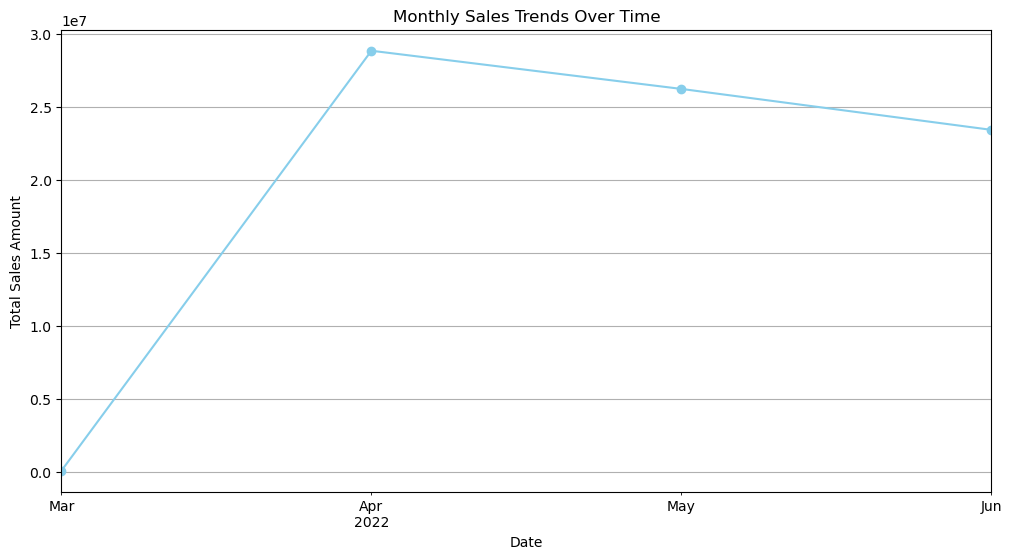

In [45]:
# Plot the sales trends over time
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o', color='skyblue')
plt.title('Monthly Sales Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales Amount')
plt.grid(True)
plt.show()

C:\Users\91959\AppData\Local\Temp\ipykernel_13380\3007021069.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


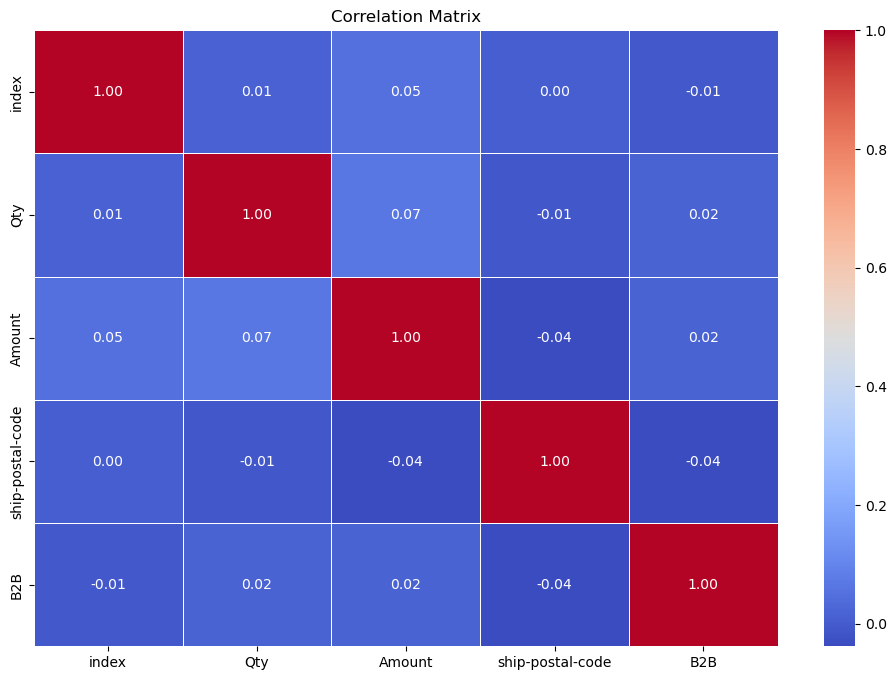

In [48]:
# Example: Correlation matrix
correlation_matrix = df.corr()

# Display a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()



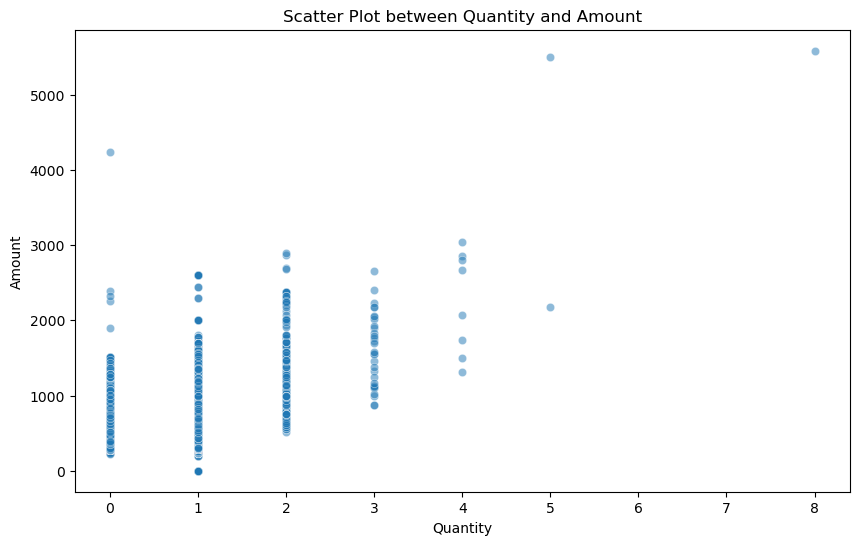

In [47]:
# Example: Scatter plot between 'Qty' and 'Amount'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Qty', y='Amount', data=df, alpha=0.5)
plt.title('Scatter Plot between Quantity and Amount')
plt.xlabel('Quantity')
plt.ylabel('Amount')
plt.show()